In [1]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mse(predict, target):
    return np.mean((predict - target) ** 2)

# **Exercise 1** -  Done!

# **Exercise 2**

**a)** **If the weights and bias of a layer has shapes (10, 4) and (10), what will the shapes of the gradients of the cost function wrt. these weights and this bias be?**

Since all of the components of the Weight matrix and Bias vector are tunneable parameters. The gradient of the cost function wrt the weights will be of shape (10, 4) and wrt the bias will be of shape (10)


In [2]:
# b) Complete the feed_forward_one_layer function.

def feed_forward_one_layer(W, b, x):
    z = np.dot(W, x) + b
    a = sigmoid(z)
    return a

def cost_one_layer(W, b, x, target):
    predict = feed_forward_one_layer(W, b, x)
    return mse(predict, target)


x = np.random.rand(2)
target = np.random.rand(3)

W= np.random.rand(3,2)
b= np.random.rand(3)

In [4]:
# c) Compute the gradient of the cost function wrt. the weigth and bias by running the cell below.

autograd_one_layer = grad(cost_one_layer, [0, 1])
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[0.02428023 0.026545  ]
 [0.01681218 0.01838036]
 [0.04549351 0.04973697]] [0.03575285 0.02475609 0.0669896 ]


# Exercise 3 - Gradient with one layer writing backpropagation by hand

We want to find the gradient of the cost function wrt. the weight and bias. This is quite hard to do directly, so we instead use the chain rule to combine multiple derivatives which are easier to compute.

$$
\frac{dC}{dW} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{dW}
$$

$$
\frac{dC}{db} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{db} \\
$$



**a)** **Which intermediary results can be reused between the two expressions?**

We can see from the above expressions that the same terms $\frac{dC}{da}$ and $\frac{da}{dz}$ are present in both gradients and are evaluated in the same batch. Therefore, after calculating those once, can be reused in both derivatives.

In [5]:
# b) What is the derivative of the cost wrt. the final activation?

z = W @ x + b
a = sigmoid(z)
predict = a

def mse_der(predict, target):
    return 2 * (predict - target)/len(target)

#Check the results
print(mse_der(predict, target))
cost_autograd = grad(mse, 0)
print(cost_autograd(predict, target))

[0.18143383 0.17981122 0.34689515]
[0.18143383 0.17981122 0.34689515]


In [6]:
# c) What is the expression for the derivative of the sigmoid activation function?

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

print(sigmoid_der(z))
sigmoid_autograd = elementwise_grad(sigmoid, 0)
print(sigmoid_autograd(z))

[0.19705725 0.13767825 0.19311194]
[0.19705725 0.13767825 0.19311194]


**d)** **Using the two derivatives you just computed, compute this intermetidary gradient you will use later:**

$$
\frac{dC}{dz} = \frac{dC}{da}\frac{da}{dz}
$$

In [7]:
dC_da = mse_der(predict, target)
da_dz = sigmoid_der(z)

**e)** **What is the derivative of the intermediary z wrt. the weight and bias? What should the shapes be? The one for the weights is a little tricky, it can be easier to play around in the next exercise first. You can also try computing it with autograd to get a hint.**

First we note that the intermediary $z$ is given by a linear combination of $W$ and $b$. Therefore, the derivative of $z$ wrt $b$ is simply 1, i.e. a vector of shape 3 with entries 1. In the same way, the derivative of $z$ wrt $W$ is equal to $x$, ie a vector of shape 2 and equal to the input.

**f)** **Now combine the expressions you have worked with so far to compute the gradients!**

In [8]:
#Combine all together

dC_da = mse_der(predict, target)
da_dz = sigmoid_der(z)
dC_dW = np.outer(dC_da * da_dz, x)
dC_db = dC_da * da_dz

#Checking results
print("Manual: ")
print(dC_dW, dC_db)
W_g, b_g = autograd_one_layer(W, b, x, target)
print("\nAutograd: ")
print(W_g, b_g)

Manual: 
[[0.02428023 0.026545  ]
 [0.01681218 0.01838036]
 [0.04549351 0.04973697]] [0.03575285 0.02475609 0.0669896 ]

Autograd: 
[[0.02428023 0.026545  ]
 [0.01681218 0.01838036]
 [0.04549351 0.04973697]] [0.03575285 0.02475609 0.0669896 ]


# Exercise 4 - Gradient with two layers writing backpropagation by hand

In [9]:
x = np.random.rand(2)
target = np.random.rand(4)

W1 = np.random.rand(3, 2)
b1 = np.random.rand(3)

W2 = np.random.rand(4, 3)
b2 = np.random.rand(4)

layers = [(W1, b1), (W2, b2)]

z1 = W1 @ x + b1
a1 = sigmoid(z1)
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

In [10]:
# a) Compute the gradients of the last layer, just like you did the single layer in the previous exercise.

dC_da2 = mse_der(a2, target)
da2_dz2 = sigmoid_der(z2)
dC_dW2 = np.outer(dC_da2 * da2_dz2, a1)
dC_db2 = dC_da2 * da2_dz2

To find the derivative of the cost wrt. the activation of the first layer, we need a new expression, the one furthest to the right in the following.

$$
\frac{dC}{da_1} = \frac{dC}{dz_2}\frac{dz_2}{da_1}
$$

**b)** What is the derivative of the second layer intermetiate wrt. the first layer activation? (First recall how you compute $z_2$)

$$
\frac{dz_2}{da_1}
$$

In [11]:
dz2_da1 = W2.T @ (dC_da2 * da2_dz2)

**c)** Use this expression, together with expressions which are equivelent to ones for the last layer to compute all the derivatives of the first layer.

$$
\frac{dC}{dW_1} = \frac{dC}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{dW_1}
$$

$$
\frac{dC}{db_1} = \frac{dC}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{db_1}
$$


In [24]:
dC_da1 = dz2_da1  #Previously calculated
da1_dz1 = sigmoid_der(z1)
dC_dz1 = dC_da1 * da1_dz1
dC_dW1 = np.outer(dC_dz1, x)
dC_db1 = dC_dz1

print("Manual derivatives:\n")
print(dC_dW1, dC_db1)
print(dC_dW2, dC_db2)

# d) Make sure you got the same gradient as the following code which uses autograd to do backpropagation.

def feed_forward_two_layers(layers, x):
    W1, b1 = layers[0]
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)

    W2, b2 = layers[1]
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    return a2

def cost_two_layers(layers, x, target):
    predict = feed_forward_two_layers(layers, x)
    return mse(predict, target)

print("\n\nAutograd:\n")
grad_two_layers = grad(cost_two_layers, 0)
grad_two_layers(layers, x, target)

Manual derivatives:

[[0.00576483 0.0110443 ]
 [0.00484135 0.00927507]
 [0.01169271 0.02240095]] [0.01132614 0.00951177 0.0229726 ]
[[0.01982972 0.02133464 0.01470696]
 [0.02662823 0.02864911 0.01974917]
 [0.01930202 0.0207669  0.01431559]
 [0.02816287 0.03030022 0.02088736]] [0.02525172 0.03390913 0.02457974 0.03586339]


Autograd:



[(array([[0.00576483, 0.0110443 ],
         [0.00484135, 0.00927507],
         [0.01169271, 0.02240095]]),
  array([0.01132614, 0.00951177, 0.0229726 ])),
 (array([[0.01982972, 0.02133464, 0.01470696],
         [0.02662823, 0.02864911, 0.01974917],
         [0.01930202, 0.0207669 , 0.01431559],
         [0.02816287, 0.03030022, 0.02088736]]),
  array([0.02525172, 0.03390913, 0.02457974, 0.03586339]))]

**e)** **How would you use the gradient from this layer to compute the gradient of an even earlier layer? Would the expressions be any different?**

The expresions would be the same. As we did in the case of two layers, the expresions for $\frac{dC}{da_1}$ can be taken as $\frac{dz_2}{da_1}$ from the consequent layer.

# Exercise 5 - Gradient with any number of layers

In [12]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

def feed_forward_saver(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W @ a + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

**a)** **Now, complete the backpropagation function so that it returns the gradient of the cost function wrt. all the weigths and biases. Use the autograd calculation below to make sure you get the correct answer.**


In [13]:
def backpropagation(input, layers, activation_funcs, target, activation_ders, cost_der=mse_der):

    layer_inputs, zs, predict = feed_forward_saver(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = np.dot(W.T, dC_dz)

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.outer(dC_dz, layer_input)
        dC_db = dC_dz

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads


#Checking the results
network_input_size = 2
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

#Batched inputs and targets
x = np.random.rand(network_input_size)
target = np.random.rand(4)

layer_grads = backpropagation(x, layers, activation_funcs, target, activation_ders)
print("Manual grads:\n")
print(layer_grads)


print("\n\nAutograds:\n")
cost_grad = grad(cost, 0)
autograds = cost_grad(layers, x, [sigmoid, ReLU], target)
print(autograds)

Manual grads:

[(array([[0.00319047, 0.03439663],
       [0.00577736, 0.06228599],
       [0.00288888, 0.03114515]]), array([0.03908846, 0.07078203, 0.03539346])), (array([[-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        ],
       [ 0.72732259,  0.52332181,  0.37939067]]), array([-0.        , -0.        , -0.        ,  0.84860068]))]


Autograds:

[(array([[0.00319047, 0.03439663],
       [0.00577736, 0.06228599],
       [0.00288888, 0.03114515]]), array([0.03908846, 0.07078203, 0.03539346])), (array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.72732259, 0.52332181, 0.37939067]]), array([0.        , 0.        , 0.        , 0.84860068]))]


# Exercise 6 - Batched inputs

**Make new versions of all the functions in exercise 5 which now take batched inputs instead. See last weeks exercise 5 for details on how to batch inputs to neural networks. You will also need to update the backpropogation function.**

For this implementation, we used the fact that we need to tranpose the weight matrix $W$ in the $z$ step and take the averages with respect to the length of the batches.

In [14]:
#The layers and architecture of the network function remains the same, because
#do not depend on the input type.
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers

#For the forward function we use W transpose to the correct shape as Weekly Ex. 42
def feed_forward(inputs, layers, activation_funcs):
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W.T + b
        a = activation_func(z)
    return a

#Cost function remains the same
def cost(layers, inputs, activation_funcs, targets):
    predict = feed_forward(inputs, layers, activation_funcs)
    return mse(predict, targets)

#As for feed_forward we use W transpose to the correct shape
def feed_forward_saver(inputs, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W.T + b  # Take transpose
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a


def backpropagation(
    inputs, layers, activation_funcs, targets, activation_ders, cost_der=mse_der
):

    layer_inputs, zs, predict = feed_forward_saver(inputs, layers, activation_funcs)

    batch_size = inputs.shape[0]

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, targets)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, _) = layers[i + 1]
            dC_da = dC_dz @ W  #Just multiply

        dC_dz = dC_da * activation_der(z)
        dC_dW = dC_dz.T @ layer_input / batch_size
        dC_db = np.mean(dC_dz, axis=0)

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads


#Checking results
network_input_size = 2
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

# Batched inputs
batch_size = 5
inputs = np.random.rand(batch_size, network_input_size)
targets = np.random.rand(batch_size, 4)

#Print the results
layer_grads = backpropagation(inputs, layers, activation_funcs, targets, activation_ders)
print("Manual derivatives:\n", layer_grads)

print("\n\nAutograd:")
cost_grad = grad(cost, 0)
autograds = cost_grad(layers, inputs, activation_funcs, targets)
print(autograds)

Manual derivatives:
 [(array([[-0.00723223, -0.00947421],
       [ 0.00465746,  0.0067694 ],
       [-0.01413253, -0.01964934]]), array([-0.0229705 ,  0.01540206, -0.04602906])), (array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.0685911 , -0.12054972, -0.07390272],
       [ 0.        ,  0.        ,  0.        ]]), array([ 0.        ,  0.        , -0.17669308,  0.        ]))]


Autograd:
[(array([[-0.00904029, -0.01184277],
       [ 0.00582182,  0.00846175],
       [-0.01766566, -0.02456168]]), array([-0.02871313,  0.01925257, -0.05753633])), (array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.08573888, -0.15068715, -0.09237839],
       [ 0.        ,  0.        ,  0.        ]]), array([ 0.        ,  0.        , -0.22086635,  0.        ]))]


After trying and carefully modifying the functions to operate on the batches, it was possible to obtain very similar expressions of the gradient with respect to Autograd, the values coincide in the signs but in all the values there is a difference of a factor of 1.25 one with respect to the other.

# Exercise 7 - Training

**a)** Complete exercise 6 and 7 from last week, but use your own backpropogation implementation to compute the gradient.

**b)** Use stochastic gradient descent with momentum when you train your network.

Inputs shape:  (150, 4)
Output shape:  (150, 3)
Accuracy:  0.05333333333333334


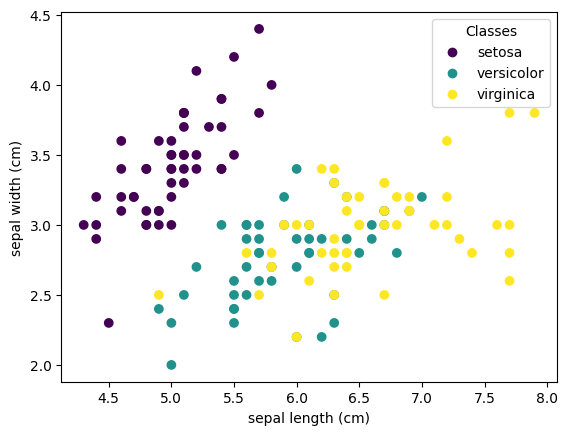

In [15]:
#### HERE WE IMPORT THE PREVIOUS RESULTS

from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)

inputs = iris.data


# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

print("Inputs shape: ", inputs.shape)
print("Output shape: ", targets.shape)

layers = create_layers(4, [8, 3])
activation_funcs = [ReLU, sigmoid]

# c) Evaluate your model on the entire iris dataset!
predictions = feed_forward(inputs, layers, activation_funcs)

# d) Compute the accuracy of your model using the accuracy function defined above
print("Accuracy: ", accuracy(predictions, targets))

Accuracy:  0.3333333333333333


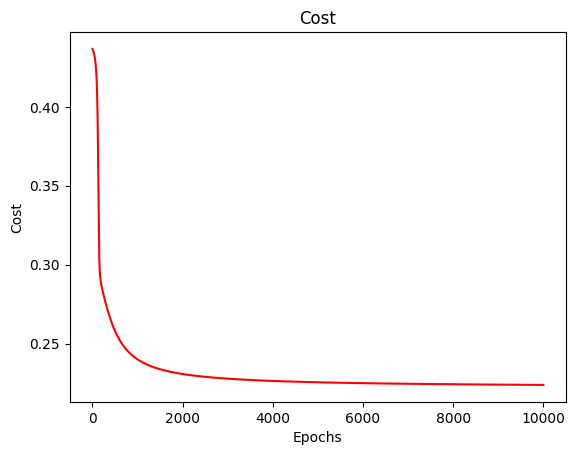

In [16]:
def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

def train_network(
    inputs, layers, activation_funcs, targets, learning_rate=0.1, epochs=10000
):
    cost_value = []
    for i in range(epochs):
        layers_grad = backpropagation(inputs, layers, activation_funcs, targets, activation_ders=[ReLU_der, sigmoid_der])
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g
            b -= learning_rate * b_g
        cost_value.append(cost(layers, inputs, activation_funcs, targets))
        predictions = feed_forward(inputs, layers, activation_funcs)
    return cost_value

layers = create_layers(4, [8, 3])
activation_funcs = [ReLU, sigmoid]
cost_value = train_network(inputs, layers, activation_funcs, targets)
predictions = feed_forward(inputs, layers, activation_funcs)
print("Accuracy: ", accuracy(predictions, targets))


#Plotting
plt.plot(cost_value, "r-")
plt.title("Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

We can see that the Accuracy value is quite low since the sigmoid function is being used as an activation function in the output layer. Since for this function we have its analytical expression of the derivative for its implementation by hand in backpropagation. However, it fails in accuracy since we are considering MSE as a cost function and not a CrossEntropyLoss, which is better for classification tasks.

Accuracy:  0.3333333333333333


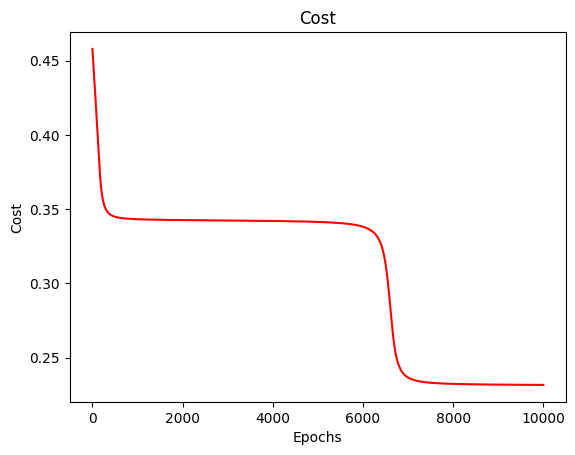

In [17]:
# Now train again including with momentum

def train_network_momentum(
    inputs, layers, activation_funcs, targets, learning_rate=0.1, momentum=0.01, epochs=10000
):
    cost_value = []
    delta_W = [np.zeros_like(W) for W, _ in layers]
    delta_b = [np.zeros_like(b) for _, b in layers]
    for i in range(epochs):
        layers_grad = backpropagation(inputs, layers, activation_funcs, targets, activation_ders=[ReLU_der, sigmoid_der])
        for idx, ((W, b), (W_g, b_g)) in enumerate(zip(layers, layers_grad)):
            delta_W[idx] = momentum * delta_W[idx] + learning_rate * W_g
            delta_b[idx] = momentum * delta_b[idx] + learning_rate * b_g
            W -= delta_W[idx]
            b -= delta_b[idx]
        cost_value.append(cost(layers, inputs, activation_funcs, targets))
    return cost_value

layers = create_layers(4, [8, 3])
activation_funcs = [ReLU, sigmoid]
cost_value = train_network(inputs, layers, activation_funcs, targets)
predictions = feed_forward(inputs, layers, activation_funcs)
print("Accuracy: ", accuracy(predictions, targets))


#Plotting
plt.plot(cost_value, "r-")
plt.title("Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

# Exercise 8 - Object orientation


Accuracy:  0.3333333333333333


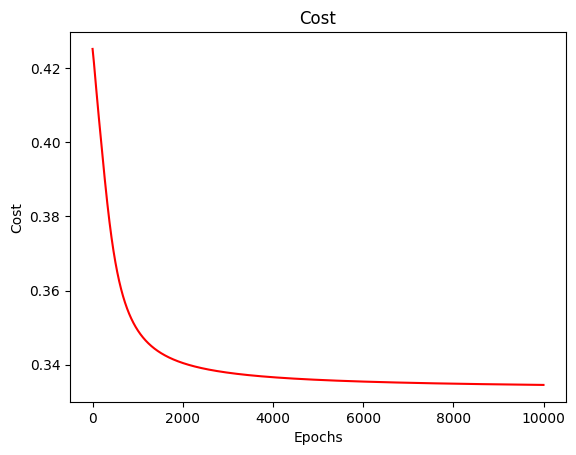

In [22]:
class NeuralNetwork:
    def __init__(
        self,
        network_input_size,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cost_fun,
        cost_der,
    ):
        self.layers = create_layers(network_input_size, layer_output_sizes)
        self.activation_funcs = activation_funcs
        self.activation_ders = activation_ders
        self.cost_fun = cost_fun
        self.cost_der = cost_der
        self.cost_value = []
        self.delta_W = [np.zeros_like(W) for W, _ in self.layers]
        self.delta_b = [np.zeros_like(b) for _, b in self.layers]
        self.learning_rate = 0.1
        self.momentum = 0.01


    def predict(self, inputs):
        # Simple feed forward pass
        a = inputs
        for (W, b), activation_func in zip(self.layers, self.activation_funcs):
            z = a @ W.T + b
            a = activation_func(z)
        return a

    def cost(self, inputs, targets):
        predict = self.predict(inputs)
        return self.cost_fun(predict, targets)

    def _feed_forward_saver(self, inputs):
        layer_inputs = []
        zs = []
        a = inputs
        for (W, b), activation_func in zip(self.layers, self.activation_funcs):
            layer_inputs.append(a)
            z = W @ a + b
            zs.append(z)
            a = activation_func(z)
        return layer_inputs, zs, a

    def compute_gradient(self, inputs, targets):
        return backpropagation(
            inputs,
            self.layers,
            self.activation_funcs,
            targets,
            self.activation_ders,
            self.cost_der,
        )  # Run the previuosly defined backpropagation


    def update_weights(self, layer_grads):
        for idx, ((W, b), (W_g, b_g)) in enumerate(zip(self.layers, layer_grads)):
            self.delta_W[idx] = self.momentum * self.delta_W[idx] + self.learning_rate * W_g
            self.delta_b[idx] = self.momentum * self.delta_b[idx] + self.learning_rate * b_g
            W -= self.delta_W[idx]
            b -= self.delta_b[idx]
        return self.delta_W, self.delta_b

    # These last two methods are not needed in the project, but they can be nice to have! The first one has a layers parameter so that you can use autograd on it
    def autograd_compliant_predict(self, layers, inputs):
        a = inputs
        for (W, b), activation_func in zip(layers, self.activation_funcs):
            z = W @ a + b
            a = activation_func(z)
        return a

    def autograd_gradient(self, inputs, targets):
        from autograd import grad
        cost_grad = grad(self.cost, 0)
        return cost_grad(self.layers, inputs, self.activation_funcs, targets)

#Create an instance
nn = NeuralNetwork(4, [8, 3], [ReLU, sigmoid], [ReLU_der, sigmoid_der], mse, mse_der)

#Train the network
nn.cost_value = train_network_momentum(inputs, nn.layers, nn.activation_funcs, targets)

#Predict and compute accuracy
predictions = nn.predict(inputs)
print("Accuracy: ", accuracy(predictions, targets))

#Plotting
plt.plot(nn.cost_value, "r-")
plt.title("Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()